In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob


# sklean
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import linear_model

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.optimizers import RMSprop
from keras.utils import np_utils



# 不必要な警告を出さない設定
import warnings
warnings.filterwarnings('ignore')

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit_df = pd.read_csv('sample_submit.csv')

In [3]:
test_df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,398,0,126,80,0,0,40.096264,0.822517,21
1,3833,3,88,60,20,0,39.810590,0.204331,22
2,4836,3,114,76,0,0,33.198760,0.521011,21
3,4572,1,146,74,0,0,26.890259,0.504950,38
4,636,1,123,90,26,140,40.270088,0.800513,28


In [4]:
#train_df = train_df[0:1999]
#test_df = test_df[0:1999]

In [5]:
print(len(train_df))
print(len(test_df))
print(len(submit_df))

3000
2000
1999


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3000 non-null   int64  
 1   Pregnancies               3000 non-null   int64  
 2   Glucose                   3000 non-null   int64  
 3   BloodPressure             3000 non-null   int64  
 4   SkinThickness             3000 non-null   int64  
 5   Insulin                   3000 non-null   int64  
 6   BMI                       3000 non-null   float64
 7   DiabetesPedigreeFunction  3000 non-null   float64
 8   Age                       3000 non-null   int64  
 9   Outcome                   3000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 234.5 KB


In [7]:
train_df.isnull().sum()

index                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#train_df['Age'].value_counts()

In [10]:
train_df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1


In [11]:
train_df.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,3.557000,113.733667,68.743667,11.164000,11.663333,35.262073,0.400476,28.932000,0.239000
std,1447.218078,3.032131,20.885612,16.332755,14.351159,45.064090,7.568025,0.274666,8.469078,0.426544
min,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000775,0.145844,21.000000,0.000000
25%,1218.750000,1.000000,100.000000,64.000000,0.000000,0.000000,32.301920,0.230987,22.000000,0.000000
50%,2465.500000,3.000000,111.000000,70.000000,0.000000,0.000000,33.835873,0.268674,26.000000,0.000000
75%,3750.250000,6.000000,125.000000,78.000000,24.000000,0.000000,39.578256,0.506778,33.000000,0.000000
max,4999.000000,13.000000,196.000000,110.000000,49.000000,579.000000,53.400629,2.302072,67.000000,1.000000


In [12]:
train_df.corr()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
index,1.000000,0.003418,0.036222,0.024221,-0.005473,0.004264,-0.022387,0.027093,0.015610,0.010270
Pregnancies,0.003418,1.000000,0.067360,-0.008811,0.003640,-0.034456,0.011715,-0.027216,0.421213,0.197909
Glucose,0.036222,0.067360,1.000000,0.007822,0.022918,0.010135,0.013754,0.053021,0.035148,0.064677
BloodPressure,0.024221,-0.008811,0.007822,1.000000,0.042476,0.040159,0.242601,0.098362,0.023235,0.051347
SkinThickness,-0.005473,0.003640,0.022918,0.042476,1.000000,0.167506,0.092715,0.141789,0.028481,0.001112
Insulin,0.004264,-0.034456,0.010135,0.040159,0.167506,1.000000,0.168287,0.219013,0.047494,0.079457
BMI,-0.022387,0.011715,0.013754,0.242601,0.092715,0.168287,1.000000,0.067524,0.082661,0.244350
DiabetesPedigreeFunction,0.027093,-0.027216,0.053021,0.098362,0.141789,0.219013,0.067524,1.000000,0.072471,0.099075
Age,0.015610,0.421213,0.035148,0.023235,0.028481,0.047494,0.082661,0.072471,1.000000,0.266000
Outcome,0.010270,0.197909,0.064677,0.051347,0.001112,0.079457,0.244350,0.099075,0.266000,1.000000


In [13]:
#train_df.hist(figsize=(20,20), color='b')

In [14]:
# 説明変数⇒X、目的変数⇒Y

X = train_df[['Pregnancies', 'BMI', 'DiabetesPedigreeFunction']]
Y = train_df['Outcome']
XT = test_df[['Pregnancies', 'BMI', 'DiabetesPedigreeFunction']]

In [15]:
print(X.shape)
print(Y.shape)

(3000, 3)
(3000,)


In [16]:
# カテゴリー変数への展開
from tensorflow.keras.utils import to_categorical

Y1 = to_categorical(Y)

In [17]:
print(X.shape)
print(Y1.shape)

(3000, 3)
(3000, 2)


In [18]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# 形状確認
print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_test:", X_test.shape, "Y_test:", Y_test.shape)
print("X_valid:", X_valid.shape, "Y_valid:", Y_valid.shape)

X_train: (1920, 3) Y_train: (1920, 2)
X_test: (600, 3) Y_test: (600, 2)
X_valid: (480, 3) Y_valid: (480, 2)


# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Dense(32, activation='relu', input_shape=(8,)))

# 隠れ層
model.add(Dense(16, activation='relu'))

# 隠れ層
model.add(Dense(4, activation='relu'))

# 出力層
model.add(Dense(2, activation='sigmoid'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [19]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Dense(6, activation='relu', input_shape=(3,)))


# 隠れ層
model.add(Dense(6, activation='relu'))

# 出力層
model.add(Dense(2, activation='sigmoid'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [20]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Dense(6, activation='relu', input_shape=(3,)))


# 隠れ層
model.add(Dense(3, activation='relu'))

# 出力層
model.add(Dense(2, activation='sigmoid'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [21]:
%%time

log = model.fit(X_train, Y_train, epochs=300, batch_size=48, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        min_delta=0, patience=300, 
                                                         verbose=1)],
               validation_data=(X_valid, Y_valid))

Epoch 1/300
40/40 [==============================] - 2s 24ms/step - loss: 0.6851 - accuracy: 0.7544 - val_loss: 0.6685 - val_accuracy: 0.7625
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.7640 - val_loss: 0.6509 - val_accuracy: 0.7625
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7849 - val_loss: 0.6353 - val_accuracy: 0.7625
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7575 - val_loss: 0.6205 - val_accuracy: 0.7625
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7618 - val_loss: 0.6075 - val_accuracy: 0.7625
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7545 - val_loss: 0.5962 - val_accuracy: 0.7625
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7590 - val_loss: 0.5862 - val_accuracy: 0.7625
Epoch 8/300


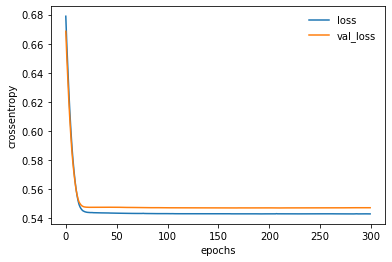

In [22]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')          #学習データ
plt.plot(log.history['val_loss'], label='val_loss')  #検証データ
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [23]:
# 予測
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)
Y_test_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [25]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       446
           1       0.00      0.00      0.00       154

    accuracy                           0.74       600
   macro avg       0.37      0.50      0.43       600
weighted avg       0.55      0.74      0.63       600



In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=Y_test_, y_pred=Y_pred)
print("予測率:", accuracy*100, "%")

予測率: 74.33333333333333 %


In [27]:
# 提出ファイル作成

In [28]:
data = XT  # 提出ファイル
# 結果
X_pred = np.array(data)
# 予測
y_pred = np.argmax(model.predict(X_pred), axis=1)  # X_predで予測データ全てが抽出できる
y_pred.shape

(2000,)

In [29]:
Submit = test_df.loc[:,["index"]]
print(len(Submit))

2000


In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
Submit['pred'] = y_pred

In [32]:
Submit['pred'].value_counts()

0    2000
Name: pred, dtype: int64

In [33]:
Submit

,index,pred
0,398,0
1,3833,0
2,4836,0
3,4572,0
4,636,0
...,...,...
1995,3138,0
1996,191,0
1997,3294,0
1998,3073,0


In [69]:
Submit.to_csv("submit_8.csv", index=False, header=False)

In [177]:
df1 = pd.read_csv('train.csv')
df1.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1


In [178]:
# 説明変数⇒X、目的変数⇒Y

x = df1.BMI
y = df1.Outcome

In [179]:
# 訓練データ7割、テストデータ3割に分割する 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [180]:
# SVCの分類モデルを作成
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

from sklearn.svm import SVC
classifier = SVC(kernel = "linear", gamma = "scale")
classifier.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))


SVC(kernel='linear')

In [181]:
# 訓練データを回帰モデルに設定
y_pred = classifier.predict(X_test.values.reshape(-1, 1))
y_pred
print(len(y_pred))

900


In [182]:
# 予測値を表示
print(len(y_test))

900


In [183]:
# 実際の値を表示
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.7477777777777778


In [184]:
# 混同行列で集計結果を表示
print(metrics.confusion_matrix(y_test, y_pred))

[[673   0]
 [227   0]]


In [185]:
# 正答率を表示
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       673
           1       0.00      0.00      0.00       227

    accuracy                           0.75       900
   macro avg       0.37      0.50      0.43       900
weighted avg       0.56      0.75      0.64       900

